## Импорт библиотек

In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

## Соединение с базой данных

In [3]:
connection = sqlite3.connect('../data/checking-logs.sqlite')

## Запрос к базе данных

In [4]:
commits_query = 'SELECT timestamp, uid FROM checker WHERE uid LIKE "user_%" AND status = "ready" AND labname = "project1"'
commits_count = pd.read_sql(commits_query, connection)
commits_count

,timestamp,uid
0,2020-04-17 05:19:02.744528,user_4
1,2020-04-17 05:22:45.549397,user_4
2,2020-04-17 05:34:24.422370,user_4
3,2020-04-17 05:43:27.773992,user_4
4,2020-04-17 05:46:32.275104,user_4
...,...,...
946,2020-05-15 10:22:39.698523,user_19
947,2020-05-15 10:22:46.248162,user_19
948,2020-05-15 10:23:18.043212,user_19
949,2020-05-15 10:38:14.430013,user_28


## Датафрейм

In [5]:
commits_count['timestamp'] = pd.to_datetime(commits_count['timestamp'])
commits_count['cnt'] = 1
commits_count['timestamp'] = commits_count['timestamp'].dt.date
commits_count = (commits_count.groupby(['uid', 'timestamp']).agg({'cnt': 'sum'}).reset_index().sort_values(['uid', 'timestamp']))
commits_count['cumulative_commits'] = commits_count.groupby('uid')['cnt'].cumsum()

## График

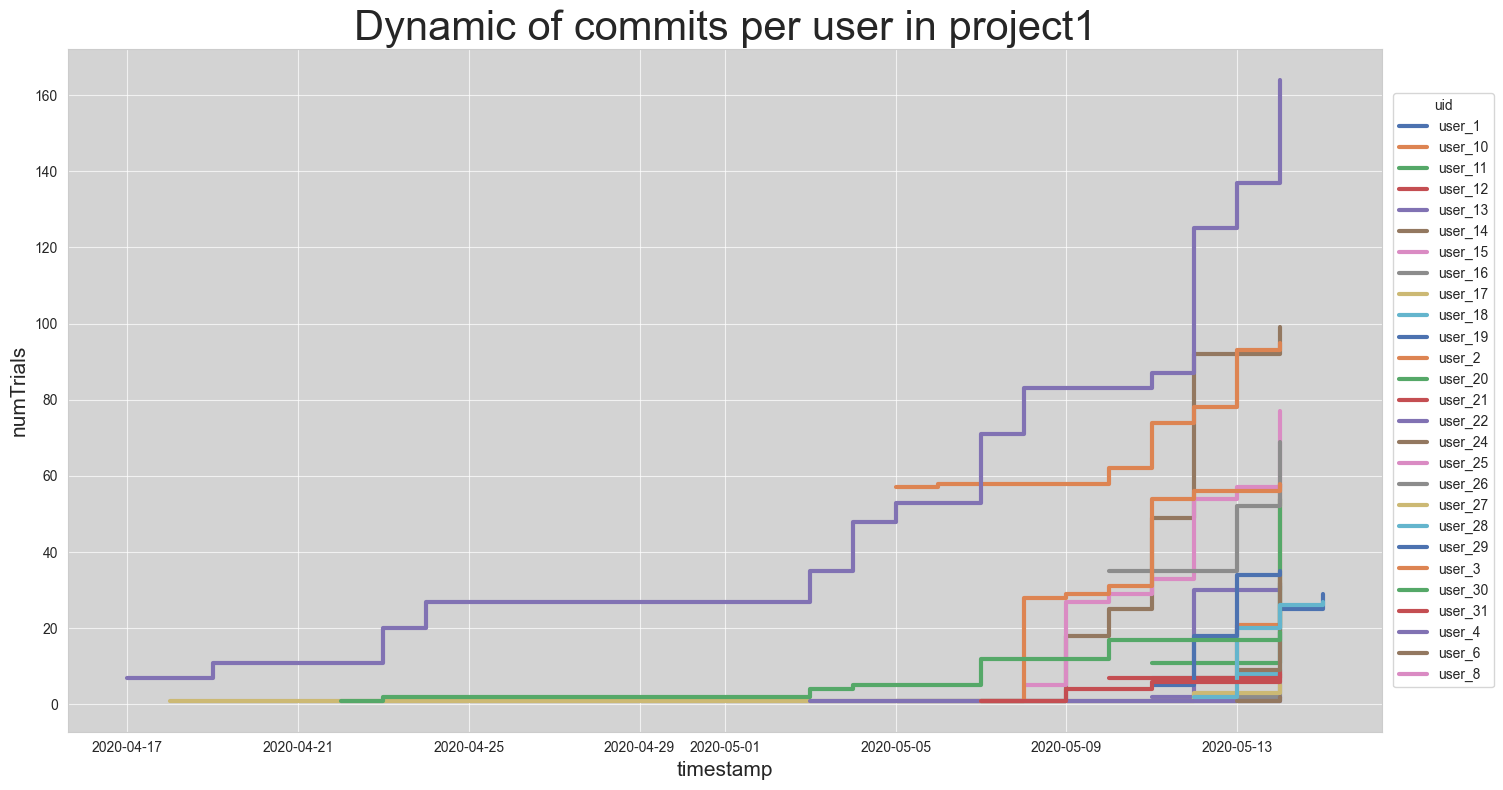

In [6]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))

sns.lineplot(data=commits_count, x='timestamp', y='cumulative_commits', hue='uid', style='uid', 
             dashes=False, palette='deep', linewidth=3, drawstyle='steps-post')

plt.title('Dynamic of commits per user in project1', fontsize=30)
plt.xlabel('timestamp', fontsize=15)
plt.ylabel('numTrials', fontsize=15)
plt.legend(title='uid', loc='center right', frameon=True, bbox_to_anchor=(1.09, 0.5))
plt.gca().set_facecolor('lightgray')
plt.grid(True, color='white', alpha=0.7)
plt.tight_layout()

plt.show()

## Закрытие соединения с БД

In [7]:
connection.close()

## Какой пользователь был лидером по количеству коммитов почти все время?

### Ответ: user_4

## Какой пользователь был лидером только короткий промежуток времени?

### Ответ: user_2